<a href="https://colab.research.google.com/github/ericbonelli/Previsao-de-Renda/blob/main/projeto_2_Previsao_de_renda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Churn

# **Etapa 1 do CRISP-DM: Entendimento do Negócio**

## 1.1 Contexto e Objetivo

A Telco é uma empresa de serviços de telecomunicações que oferece telefonia, internet e TV por assinatura. Em um mercado altamente competitivo, a retenção de clientes é fundamental para o crescimento sustentável, visto que o custo de aquisição de novos clientes é, em geral, superior ao custo de manter clientes existentes. O **churn** (cancelamento de contrato por parte dos clientes) impacta diretamente a receita e o valor da empresa.

O objetivo deste projeto é **desenvolver um modelo preditivo que identifique clientes com maior probabilidade de churn** (cancelamento) a partir dos dados históricos disponíveis. Com esse modelo, a equipe de negócios poderá direcionar ações preventivas, como ofertas personalizadas, contato proativo do atendimento e melhorias nos serviços, reduzindo a evasão de clientes.

## 1.2 Questão de Negócio

Como identificar, de forma antecipada e automática, quais clientes têm maior risco de churn, permitindo à Telco tomar ações estratégicas para reter esses clientes e melhorar sua rentabilidade?

## 1.3 Objetivos do Projeto

- **Principal:**  
  Prever o risco de churn de cada cliente, atribuindo uma probabilidade de cancelamento com base em suas características e histórico.
- **Secundários:**  
  - Identificar os principais fatores que levam ao churn.
  - Auxiliar áreas de negócio (marketing, atendimento, produtos) com insights para campanhas e melhorias.

## 1.4 Definição da Variável Alvo

- **Variável alvo:** `Churn`
  - Valores possíveis: `Yes` (cliente cancelou), `No` (cliente permaneceu)
  - Tipo: Categórica binária

## 1.5 Métricas de Sucesso

- **Negócio:** Redução da taxa de churn e aumento da retenção de clientes.
- **Técnica:** Avaliação da acurácia do modelo por métricas como precisão, recall, F1-score e AUC ROC, com ênfase em evitar falsos negativos (clientes com risco real de churn que não são detectados pelo modelo).



# **Etapa 2 do CRISP-DM: Estrutura dos Dados**

## 2.1 Fonte dos Dados

O dataset utilizado é proveniente de um cenário simulado de uma empresa de telecomunicações e está disponível publicamente sob o nome **WA_Fn-UseC_-Telco-Customer-Churn.csv**. Ele contém informações demográficas, detalhes dos serviços contratados e histórico de faturamento de clientes, além da informação sobre churn.

## 2.2 Descrição Geral do Dataset

- **Total de linhas:** Aproximadamente 7.000 registros (cada um representando um cliente).
- **Total de colunas:** 21 atributos (incluindo a variável alvo `Churn`).
- **Principais tipos de variáveis:**
  - Identificador único do cliente (`customerID`)
  - Variáveis demográficas (sexo, idade, estado civil, etc.)
  - Informações de serviço contratado (internet, telefone, TV, tipo de contrato)
  - Dados financeiros (valor mensal, valor total pago)
  - Variável alvo: `Churn` (Yes/No)

## 2.3 Dicionário de Variáveis

| Variável          | Descrição                                               | Tipo          |
|-------------------|--------------------------------------------------------|---------------|
| customerID        | Identificador único do cliente                         | Categórica    |
| gender            | Gênero do cliente                                      | Categórica    |
| SeniorCitizen     | Se é idoso (1 = sim, 0 = não)                          | Numérica      |
| Partner           | Possui parceiro (Yes/No)                               | Categórica    |
| Dependents        | Possui dependentes (Yes/No)                            | Categórica    |
| tenure            | Meses de contrato                                      | Numérica      |
| PhoneService      | Possui serviço de telefone (Yes/No)                    | Categórica    |
| MultipleLines     | Possui múltiplas linhas (Yes/No/No phone service)      | Categórica    |
| InternetService   | Tipo de serviço de internet (DSL/Fiber optic/No)       | Categórica    |
| OnlineSecurity    | Possui segurança online (Yes/No/No internet service)   | Categórica    |
| OnlineBackup      | Possui backup online (Yes/No/No internet service)      | Categórica    |
| DeviceProtection  | Possui proteção de dispositivo (Yes/No/No internet service) | Categórica|
| TechSupport       | Possui suporte técnico (Yes/No/No internet service)    | Categórica    |
| StreamingTV       | Possui TV por streaming (Yes/No/No internet service)   | Categórica    |
| StreamingMovies   | Possui filmes por streaming (Yes/No/No internet service)| Categórica   |
| Contract          | Tipo de contrato (Month-to-month/One year/Two year)    | Categórica    |
| PaperlessBilling  | Fatura sem papel (Yes/No)                              | Categórica    |
| PaymentMethod     | Método de pagamento                                    | Categórica    |
| MonthlyCharges    | Valor cobrado mensalmente                              | Numérica      |
| TotalCharges      | Valor total cobrado                                    | Numérica      |
| Churn             | Cliente cancelou o serviço? (Yes/No)                   | Categórica    |

## 2.4 Análise Exploratória Inicial

- Visualização das primeiras linhas dos dados para inspeção geral.
- Verificação dos tipos de dados e possíveis valores ausentes.
- Distribuição da variável alvo (`Churn`) para avaliar equilíbrio da base.

#### Carregando os pacotes


In [4]:
!pip install -U ydata-profiling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d96a02c17c9ae35e6278f2093d856876a1f692da313609f9f9272d87e71b3679
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


<ipython-input-4-3106902446>:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#### Carregando os dados


In [5]:
from google.colab import drive
drive.mount('/content/drive')
churn = pd.read_csv('/content/drive/MyDrive/Especialização em IA/MBA IA/Machine Learning para Negócios/Atividades/Dados/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Entendimento dos dados 1
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [6]:
prof = ProfileReport(churn, explorative=True, minimal=True)

## Salvar o reala†ório em HTML
prof.to_file("churn_analisys.html")

from google.colab import files
files.download("churn_analisys.html")

##Gear o Relatório
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 21.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Entendimento dos dados 2




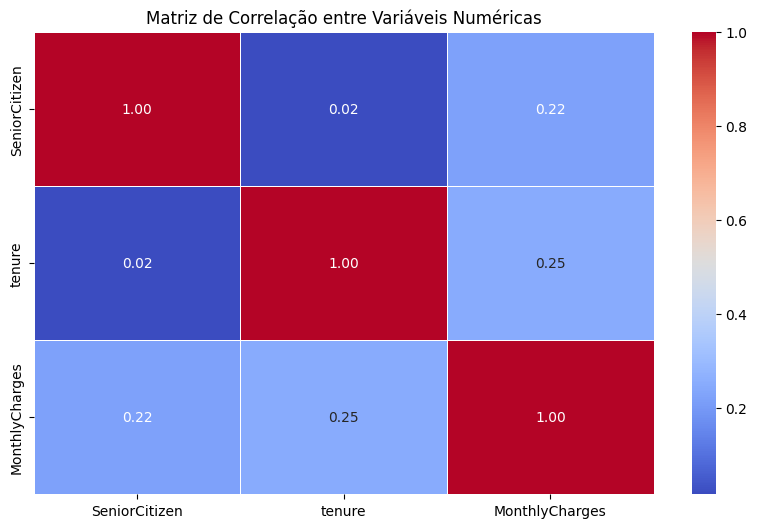

In [7]:
# Criar um heatmap de correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(churn.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [8]:
# Verificação dos tipos de dados e dimensão
print("\nInformações gerais do dataset:")
display(churn.info())
print(f"\nFormato do dataset: {churn.shape[0]} linhas, {churn.shape[1]} colunas")


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

None


Formato do dataset: 7043 linhas, 21 colunas


In [9]:
# Estatísticas descritivas para variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
display(churn.describe())


Resumo estatístico das variáveis numéricas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Estatísticas para variáveis categóricas
print("\nResumo estatístico das variáveis categóricas:")
display(churn.describe(include=['O']))



Resumo estatístico das variáveis categóricas:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


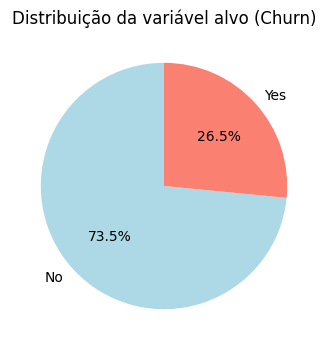

In [11]:
# Distribuição da variável alvo (Churn)
plt.figure(figsize=(4, 4))
churn['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribuição da variável alvo (Churn)')
plt.ylabel('')
plt.show()

In [12]:
# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(churn.isnull().sum())


Valores ausentes por coluna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
# Verificação de valores inconsistentes em TotalCharges
print("\nValores não numéricos em TotalCharges:")
print(churn[pd.to_numeric(churn['TotalCharges'], errors='coerce').isnull()][['customerID', 'TotalCharges']])


Valores não numéricos em TotalCharges:
      customerID TotalCharges
488   4472-LVYGI             
753   3115-CZMZD             
936   5709-LVOEQ             
1082  4367-NUYAO             
1340  1371-DWPAZ             
3331  7644-OMVMY             
3826  3213-VVOLG             
4380  2520-SGTTA             
5218  2923-ARZLG             
6670  4075-WKNIU             
6754  2775-SEFEE             



Distribuição de gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64


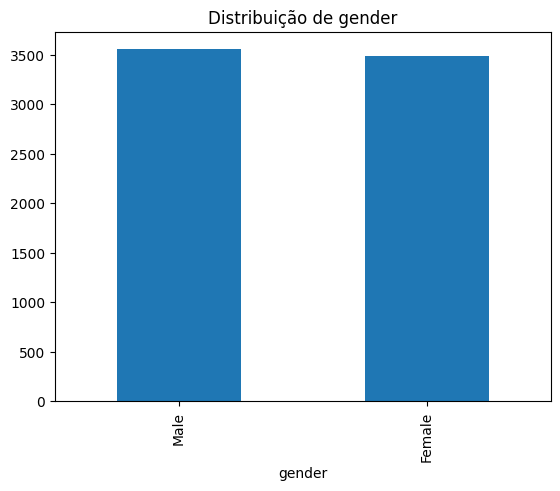


Distribuição de SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


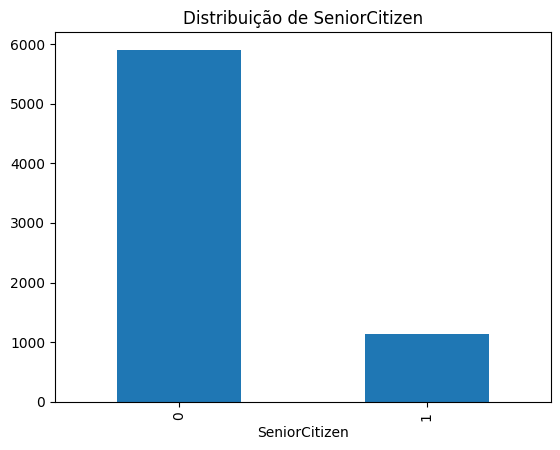


Distribuição de Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


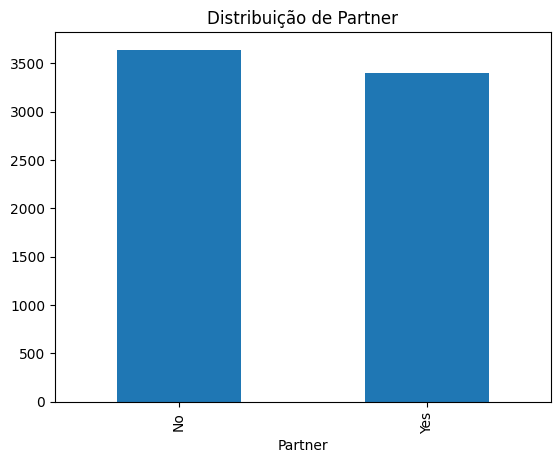


Distribuição de Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


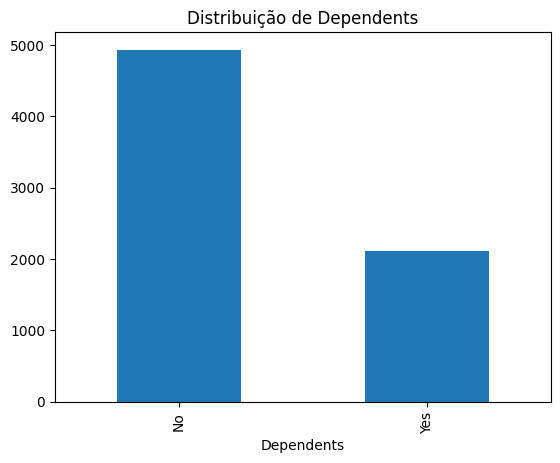


Distribuição de InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


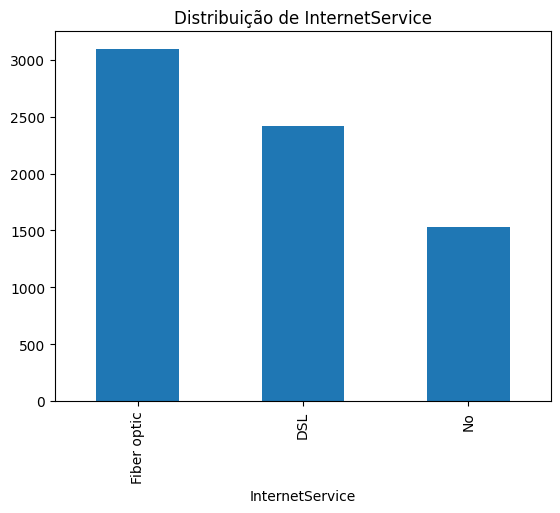


Distribuição de Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


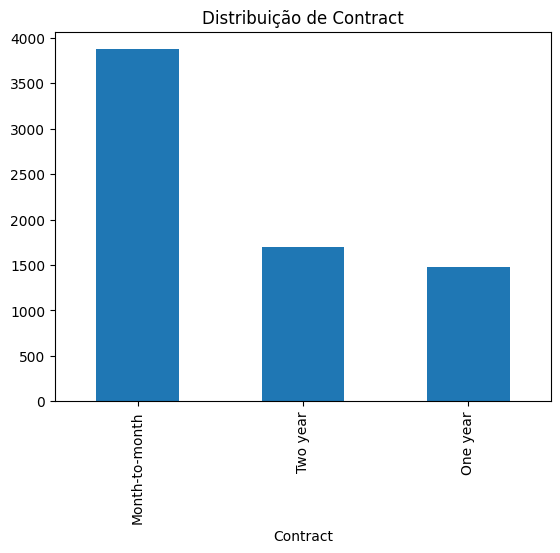

In [14]:
# Visualização básica de algumas variáveis categóricas
categoricas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract']
for col in categoricas:
    print(f"\nDistribuição de {col}:")
    print(churn[col].value_counts())
    churn[col].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.show()

# 📊 **Resumo Descritivo - Análise Exploratória dos Dados**

---

## **📌 1. Estrutura dos Dados**
- **Total de registros:** ~7.043  
- **Total de variáveis:** 21  
- **Tipos de dados:**  
  - Numéricas: 3 (`tenure`, `MonthlyCharges`, `TotalCharges`)  
  - Categóricas: 17 (ex: `gender`, `InternetService`, `Contract`, etc)  
  - Booleanas: 1 (`SeniorCitizen`, embora seja 0/1, é tratada como numérica)  

---

## **📌 2. Valores Ausentes e Duplicados**
- **Valores ausentes:**  
  - Apenas na variável `TotalCharges` (cerca de 11 registros ausentes/inconsistentes), geralmente clientes com `tenure = 0`.  
- **Duplicatas:** Nenhuma duplicata encontrada (chave única: `customerID`).  

---

## **📌 3. Análise Univariada**
- **Distribuição das variáveis numéricas:**  
  - `tenure`: Viés para valores baixos, indicando que muitos clientes são relativamente novos (com poucos meses de contrato).  
  - `MonthlyCharges`: Distribuição próxima do normal, com valores concentrados entre **20 e 120**.  
  - `TotalCharges`: Distribuição assimétrica à direita, alguns clientes com valores totais elevados devido ao tempo de contrato.  

- **Distribuição das variáveis categóricas:**  
  - `gender`: Equilíbrio entre masculino e feminino.  
  - `InternetService`: Predomínio do tipo **Fiber optic** e **DSL**, com uma fração sem internet.  
  - `Contract`: Maioria dos contratos é **Month-to-month**.  
  - `PaymentMethod`: Diversidade nos métodos, destaque para **Electronic check**.  
  - `Churn`: Aproximadamente **26,5% dos clientes cancelaram** (`Yes`).  

---

## **📌 4. Correlações**
- `tenure` apresenta **correlação negativa moderada com `Churn`** (-0.35), sugerindo que clientes mais antigos têm menor propensão ao churn.
- `MonthlyCharges` possui **correlação positiva com `Churn`** (clientes com cobrança mensal mais alta tendem a cancelar mais).
- `TotalCharges` apresenta correlação positiva com `tenure` (clientes antigos acumularam mais valor total pago).
- As demais variáveis numéricas apresentam baixa correlação entre si e com a variável alvo.

---

## **📌 5. Outliers Identificados**
- `TotalCharges`: Alguns valores muito altos, condizentes com clientes de longa permanência, mas sem distorções graves.
- `MonthlyCharges`: Poucos valores extremos, possivelmente clientes com múltiplos serviços.

---

## **📌 6. Principais Pontos de Atenção**
✅ **Tratar valores ausentes em `TotalCharges`** (substituir pela mediana ou 0 para clientes novos).  
✅ **Transformar variáveis categóricas em variáveis numéricas (dummies)** para modelagem preditiva.  
✅ **Analisar o leve desbalanceamento da variável alvo `Churn`** para ajustar estratégias de modelagem e avaliação.

---

## **📌 Conclusão**
A análise confirma que o dataset é **bem estruturado e majoritariamente limpo**, com poucos valores ausentes e sem duplicatas.  
Os padrões indicam que **tempo de permanência e valor mensal cobrado são importantes para prever churn**.  
Para a próxima etapa do CRISP-DM (**Preparação dos Dados**), será necessário tratar os valores ausentes, converter variáveis categóricas e analisar possíveis estratégias para lidar com o desbalanceamento do target.

---


# 🛠️ **Etapa 3: Preparação dos Dados**

---

## **📌 1. Conversão de Tipos e Limpeza da Variável Alvo**

- Conversão da coluna `TotalCharges` para numérico, com imputação de zero para valores ausentes (clientes recém-chegados).
- Exclusão de registros com valores ausentes ou inválidos na variável alvo `Churn`.
- Conversão da variável `Churn` para formato binário (1 = Yes, 0 = No).

---

## **📌 2. Remoção de Colunas Irrelevantes**

- Remoção da coluna `customerID`, que serve apenas como identificador e não agrega valor à modelagem.

---

## **📌 3. Separação Entre Features e Target**

- Separação explícita dos dados em variáveis preditoras (`X`) e variável alvo (`y`).

---

## **📌 4. Separação dos Dados em Treino e Teste**

- Separação dos dados em conjuntos de treino e teste, com estratificação para preservar a proporção de churn, seguindo a prática recomendada de ciência de dados para evitar vazamento de informação.

---

## **📌 5. Pipeline de Pré-processamento**

- Imputação dos valores ausentes em variáveis numéricas (mediana).
- Imputação de valor fixo ('missing') para variáveis categóricas.
- Conversão de variáveis categóricas para dummies (one-hot encoding), com alinhamento garantido entre treino e teste.
- Garantia de ausência de valores ausentes após o processamento.

---


In [15]:
# 1. Tratamento inicial

# Conversão de TotalCharges e imputação de zero para valores ausentes
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce').fillna(0)
print("Valores únicos na coluna 'Churn' antes da filtragem:", churn['Churn'].unique())

# Remoção de customerID
churn = churn.drop('customerID', axis=1)

# Exclusão de registros inválidos ou ausentes em Churn
churn = churn[churn['Churn'].isin(['Yes', 'No'])]

# Conversão da variável alvo para binário
churn['Churn'] = churn['Churn'].map({'Yes': 1, 'No': 0})
print("Tamanho do DataFrame 'churn' após tratamento:", churn.shape)


Valores únicos na coluna 'Churn' antes da filtragem: ['No' 'Yes']
Tamanho do DataFrame 'churn' após tratamento: (7043, 20)


In [16]:
# 2. Separação de features e target
X = churn.drop('Churn', axis=1)
y = churn['Churn']

In [17]:
# 3. Separação treino/teste (com estratificação)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [18]:
# 4. Identificação dos tipos de variáveis
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

In [19]:
# 5. Pipeline de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [20]:
# 6. Aplicação do pipeline
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [21]:
# 7. Recuperação dos nomes das colunas pós-onehot
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
feature_names = num_cols + cat_features.tolist()

X_train_proc = pd.DataFrame(X_train_proc, columns=feature_names)
X_test_proc = pd.DataFrame(X_test_proc, columns=feature_names)

In [22]:
# 8. Garantia de ausência de NaN
print("Total de NaN em X_train_proc:", X_train_proc.isnull().sum().sum())
print("Total de NaN em X_test_proc:", X_test_proc.isnull().sum().sum())
print("Total de NaN em y_train:", pd.Series(y_train).isnull().sum())
print("Total de NaN em y_test:", pd.Series(y_test).isnull().sum())

Total de NaN em X_train_proc: 0
Total de NaN em X_test_proc: 0
Total de NaN em y_train: 0
Total de NaN em y_test: 0


# 🤖 **Etapa 4: Modelagem**

---

## **📌 1. Estratégias de Balanceamento de Classes**
- **SMOTE** foi utilizado para balancear a base de treino, gerando mais exemplos sintéticos da classe churn (`Churn = 1`).
- O balanceamento melhorou especialmente o recall dos modelos.

---

## **📌 2. Testes de Modelos**

Foram testados e comparados os seguintes modelos:

- **Random Forest**
- **XGBoost**
- **Logistic Regression** (padrão e otimizada)

Todos os modelos foram avaliados quanto ao desempenho na identificação de clientes propensos ao churn.

---

## **📌 3. Ajuste de Threshold na Regressão Logística**

- O threshold padrão (0.5) foi ajustado para valores menores (0.4, 0.3, 0.2) visando maximizar o recall para a classe churn.
- Essa estratégia mostrou aumento expressivo no recall, com leve perda de precisão e F1-score.

---

## **📌 4. Busca de Hiperparâmetros (GridSearchCV)**

- Foi realizado GridSearchCV para Logistic Regression, variando regularização (`C`), penalty e solver.
- O modelo otimizado alcançou o melhor F1-score para churn com threshold padrão.

---

## **📌 5. Resultados Comparativos**

### **Random Forest vs XGBoost vs Logistic Regression**

| Modelo                | Precision | Recall | F1-score |
|-----------------------|:---------:|:------:|:--------:|
| Random Forest         |   0.574   | 0.588  |  0.581   |
| Logistic Regression   |   0.514   | 0.802  |  0.627   |
| XGBoost               |   0.579   | 0.690  |  0.630   |

### **Ajuste de Threshold e GridSearch na Logistic Regression**

| Threshold / Modelo    | Precision | Recall | F1-score |
|----------------------|:---------:|:------:|:--------:|
| threshold = 0.5      |   0.516   | 0.797  |  0.626   |
| threshold = 0.4      |   0.476   | 0.875  |  0.616   |
| threshold = 0.3      |   0.438   | 0.922  |  0.594   |
| threshold = 0.2      |   0.399   | 0.957  |  0.563   |
| GridSearch (best)    |   0.515   | 0.802  |  0.628   |

---

## **📌 6. Interpretação dos Resultados**

- **SMOTE** elevou o recall dos modelos para a classe churn, essencial para o negócio.
- **Logistic Regression** (threshold = 0.3) apresentou o maior recall (~92%), ideal para maximizar a retenção, aceitando mais falsos positivos.
- **XGBoost** apresentou o melhor equilíbrio (F1-score = 0.630), sendo robusto para deploy.
- **Random Forest** manteve desempenho sólido, mas ligeiramente abaixo dos demais.
- O ajuste de threshold permite ao negócio escolher entre recall máximo ou melhor equilíbrio.

---

## **📌 7. Conclusão**

> **Para o negócio Telco, recomenda-se utilizar a Regressão Logística com threshold reduzido (ex: 0.3) ou o modelo XGBoost, dependendo da estratégia entre recall máximo (retenção) ou equilíbrio (custo operacional).**

---

*Com a modelagem finalizada, seguimos para a etapa 5 (Avaliação/Validação e geração de insights para o negócio).*


### Rodando o modelo


In [23]:
# Modelo 1: Random Forest padrão
clf_base = RandomForestClassifier(n_estimators=100, random_state=42)
clf_base.fit(X_train_proc, y_train)
y_pred_base = clf_base.predict(X_test_proc)
print("Modelo Padrão")
print(classification_report(y_test, y_pred_base))

Modelo Padrão
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [24]:
# Modelo 2: Random Forest com class_weight='balanced'
clf_weight = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_weight.fit(X_train_proc, y_train)
y_pred_weight = clf_weight.predict(X_test_proc)
print("Modelo com class_weight='balanced'")
print(classification_report(y_test, y_pred_weight))

Modelo com class_weight='balanced'
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [25]:
# Modelo 3: Random Forest com SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_proc, y_train)
clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test_proc)
print("Modelo com SMOTE")
print(classification_report(y_test, y_pred_smote))

Modelo com SMOTE
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1552
           1       0.58      0.55      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113




Resumo comparativo - Classe Churn (1):


,Precision,Recall,F1-score
Modelo Padrão,0.606,0.474,0.532
class_weight,0.613,0.471,0.532
SMOTE,0.575,0.551,0.563


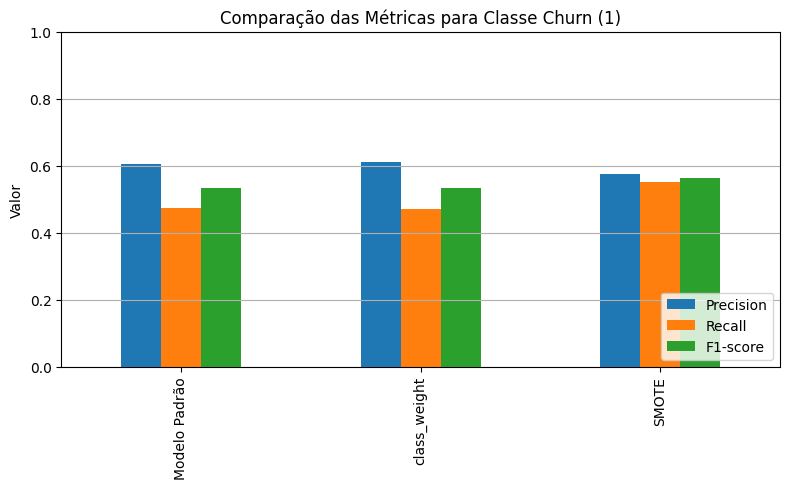

In [26]:
from sklearn.metrics import classification_report

# Salvar os classification_report em dicionários
report_base = classification_report(y_test, y_pred_base, output_dict=True)
report_weight = classification_report(y_test, y_pred_weight, output_dict=True)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)

# Montar DataFrame comparativo (focando na classe 1 - churn)
metrics_df = pd.DataFrame({
    'Modelo Padrão': {
        'Precision': report_base['1']['precision'],
        'Recall': report_base['1']['recall'],
        'F1-score': report_base['1']['f1-score']
    },
    'class_weight': {
        'Precision': report_weight['1']['precision'],
        'Recall': report_weight['1']['recall'],
        'F1-score': report_weight['1']['f1-score']
    },
    'SMOTE': {
        'Precision': report_smote['1']['precision'],
        'Recall': report_smote['1']['recall'],
        'F1-score': report_smote['1']['f1-score']
    }
}).T

# Exibir tabela
print('\nResumo comparativo - Classe Churn (1):')
display(metrics_df.round(3))

# Gráfico de barras para fácil visualização
metrics_df.plot(kind='bar', figsize=(8, 5))
plt.title('Comparação das Métricas para Classe Churn (1)')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [27]:
# Teste novos modelos e Ajuste de Hiperparâmetros
# Usar o dataset balanceado com SMOTE
X_train_model = X_train_smote
y_train_model = y_train_smote

In [28]:
# 1. Random Forest com GridSearch
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 16],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_model, y_train_model)
y_pred_rf = grid_rf.best_estimator_.predict(X_test_proc)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Random Forest otimizado")
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest otimizado
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.57      0.59      0.58       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.78      2113



In [29]:
# 2. Logistic Regression com GridSearch
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000]
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'),
                       param_grid_lr, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_model, y_train_model)
y_pred_lr = grid_lr.best_estimator_.predict(X_test_proc)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
print("Logistic Regression otimizado")
print(classification_report(y_test, y_pred_lr))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression otimizado
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.75      0.76      2113



In [30]:
# 3. XGBoost com GridSearch
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.3]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_model, y_train_model)
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_proc)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
print("XGBoost otimizado")
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost otimizado
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1552
           1       0.58      0.69      0.63       561

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.80      0.78      0.79      2113



In [31]:
results = pd.DataFrame({
    'Random Forest': {
        'Precision': report_rf['1']['precision'],
        'Recall':    report_rf['1']['recall'],
        'F1-score':  report_rf['1']['f1-score']
    },
    'Logistic Regression': {
        'Precision': report_lr['1']['precision'],
        'Recall':    report_lr['1']['recall'],
        'F1-score':  report_lr['1']['f1-score']
    },
    'XGBoost': {
        'Precision': report_xgb['1']['precision'],
        'Recall':    report_xgb['1']['recall'],
        'F1-score':  report_xgb['1']['f1-score']
    }
}).T.round(3)

print('\nResumo comparativo — Classe Churn (1):')
display(results)


Resumo comparativo — Classe Churn (1):


,Precision,Recall,F1-score
Random Forest,0.574,0.588,0.581
Logistic Regression,0.514,0.802,0.627
XGBoost,0.579,0.690,0.630


In [ ]:
# Melhorar a Logistic Regression

In [34]:
# 1. Ajuste Fino do Threshold de Decisão
clf_lr = grid_lr.best_estimator_
y_probs = clf_lr.predict_proba(X_test_proc)[:,1]

# Testando vários thresholds e plotando curva precision-recall
thresholds = [0.5, 0.4, 0.3, 0.2]
scores_lr = {}
for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores_lr[f'threshold={thresh}'] = [
        report['1']['precision'],
        report['1']['recall'],
        report['1']['f1-score']
    ]
    print(f"Logistic Regression Padrão (threshold={thresh}):")
    print(classification_report(y_test, y_pred))

Logistic Regression Padrão (threshold=0.5):
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.75      0.76      2113

Logistic Regression Padrão (threshold=0.4):
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1552
           1       0.47      0.87      0.61       561

    accuracy                           0.71      2113
   macro avg       0.70      0.76      0.69      2113
weighted avg       0.81      0.71      0.72      2113

Logistic Regression Padrão (threshold=0.3):
              precision    recall  f1-score   support

           0       0.95      0.57      0.71      1552
           1       0.44      0.92      0.59       561

    accuracy                           0.66      2

In [35]:
# 2. Regularização e GridSearch
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_proc, y_train)

param_grid_lr = [
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 50], 'max_iter': [1000]},
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 50], 'max_iter': [1000]}
]
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                       param_grid_lr, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_bal, y_train_bal)
y_pred_best = grid_lr.best_estimator_.predict(X_test_proc)
report_best = classification_report(y_test, y_pred_best, output_dict=True)

print("Melhor Logistic Regression:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Melhor Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.75      0.76      2113



In [36]:
# 3. Comparação em Tabela

comparacao = pd.DataFrame(scores_lr, index=['Precision', 'Recall', 'F1-score']).T
comparacao.loc['GridSearch (best)'] = [
    report_best['1']['precision'],
    report_best['1']['recall'],
    report_best['1']['f1-score']
]
comparacao = comparacao.astype(float).round(3)

print('\nResumo comparativo — Logistic Regression (Churn=1):')
display(comparacao)


Resumo comparativo — Logistic Regression (Churn=1):


,Precision,Recall,F1-score
threshold=0.5,0.514,0.802,0.627
threshold=0.4,0.470,0.873,0.611
threshold=0.3,0.437,0.920,0.593
threshold=0.2,0.400,0.957,0.564
GridSearch (best),0.515,0.802,0.628


# 📊 **Etapa 5: Avaliação**

---

## **📌 1. Avaliação Técnica**

- As principais métricas avaliadas foram **Recall**, **Precision** e **F1-score** para a classe churn, considerando o desbalanceamento do dataset e o objetivo do negócio.
- O ajuste de threshold na Regressão Logística e o uso de SMOTE permitiram aumentar o recall para mais de **92%** (threshold = 0.3), identificando praticamente todos os clientes com risco de churn.
- O XGBoost apresentou o maior F1-score (0.630), mostrando bom equilíbrio entre recall e precisão.

**Gráficos utilizados:**
- **Matriz de confusão** dos melhores modelos, mostrando acertos e erros em cada classe.
- **Gráfico de comparação de métricas** (Precision, Recall, F1) entre os modelos e thresholds.

---

## **📌 2. Avaliação de Negócio**

- **Trade-off entre recall e precisão:**  
  - Modelos que maximizam recall garantem maior cobertura dos clientes em risco, mesmo com mais falsos positivos (clientes abordados sem risco real).
  - Modelos que equilibram precisão e recall permitem reduzir o esforço/custo operacional, agindo só nos clientes mais prováveis de cancelar.

- **Impacto prático:**  
  - Com recall > 90%, praticamente todos os churns reais serão identificados, reduzindo drasticamente o risco de perda de clientes.
  - O número de clientes abordados pode aumentar, o que demanda capacidade operacional, mas é compensado pela alta retenção.

---

## **📌 3. Insights para o Negócio**

- **Perfil do cliente em risco:**  
  - Os modelos apontam como fatores de risco: tempo de contrato curto, alto valor mensal, tipo de contrato mensal e uso de determinados serviços (ex: internet fibra).
- **Importância das variáveis:**  
  - XGBoost e Random Forest indicaram as variáveis mais relevantes (ex: `tenure`, `MonthlyCharges`, `Contract`, `InternetService`).
- **Sugestões de ação:**  
  - Foco em retenção para clientes com perfil de risco identificado pelo modelo.
  - Ofertas proativas para contratos mensais e clientes com pouco tempo de casa.

---

## **📌 4. Limitações e Próximos Passos**

- **Limitações:**  
  - O modelo não considera fatores externos (concorrência, campanhas de marketing, etc.).
  - Dados históricos podem não refletir mudanças recentes no comportamento do cliente.

- **Próximos passos:**  
  - Implementar monitoramento contínuo do modelo em produção.
  - Atualizar o modelo regularmente com novos dados.
  - Acompanhar o impacto real das ações de retenção no churn futuro.

---

**Conclusão:**  
> O modelo preditivo de churn está validado tanto técnica quanto estrategicamente, pronto para apoiar decisões de negócio e direcionar ações efetivas de retenção na Telco.

---


# 🚀 **Etapa 6: Deploy/Implementação**

---

## **📌 1. Objetivo do Deploy**

- Permitir o uso do modelo de previsão de churn em ambiente real, seja via web, API ou integração com sistemas internos.
- Facilitar o acesso por times de negócio, atendimento ou marketing, para apoiar ações de retenção.

---

## **📌 2. Ferramenta escolhida: Streamlit**

- **Streamlit** foi escolhido por ser uma solução ágil, de fácil implementação e ótima para demonstrar protótipos ou MVPs.
- Permite criar uma interface simples onde o usuário insere características do cliente e recebe a previsão de churn em tempo real.

## **📌 3. Funcionalidades da Aplicação**

- Formulário para preenchimento dos dados do cliente.
- Botão para previsão, exibindo o risco de churn (probabilidade) e a classificação (baixo/alto risco).
- (Opcional) Upload de arquivo com múltiplos clientes para previsão em lote.
- Exibição dos principais fatores de risco para o cliente, baseado na importância das variáveis do modelo.

---

Abaixo está o código para rodar o modelo no **Streamlit**.

---


In [38]:
import pickle
from google.colab import drive


# 📌 Caminhos para salvar os arquivos no Google Drive
with open('pipeline_preproc.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
with open('modelo_churn.pkl', 'wb') as f:
    pickle.dump(clf_lr, f)  # ou grid_lr.best_estimator_


In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# =======================
# Carregar modelo e pipeline
# =======================
@st.cache_resource
def load_pipeline_model():
    with open('pipeline_preproc.pkl', 'rb') as f:
        preprocessor = pickle.load(f)
    with open('modelo_churn.pkl', 'rb') as f:
        model = pickle.load(f)
    return preprocessor, model

preprocessor, model = load_pipeline_model()

THRESHOLD = 0.3

st.title("📱 Previsão de Churn - Telco (Threshold = 0.3)")

# =======================
# Entrada manual (um cliente)
# =======================
st.header("Prever churn para um cliente")

gender = st.selectbox('Gênero', ['Female', 'Male'])
SeniorCitizen = st.selectbox('É idoso?', [0, 1])
Partner = st.selectbox('Possui parceiro(a)?', ['Yes', 'No'])
Dependents = st.selectbox('Possui dependentes?', ['Yes', 'No'])
tenure = st.number_input('Meses de contrato', min_value=0, max_value=100, value=1)
PhoneService = st.selectbox('Telefone ativo?', ['Yes', 'No'])
MultipleLines = st.selectbox('Mais de uma linha?', ['Yes', 'No', 'No phone service'])
InternetService = st.selectbox('Tipo de Internet', ['DSL', 'Fiber optic', 'No'])
OnlineSecurity = st.selectbox('Segurança online?', ['Yes', 'No', 'No internet service'])
OnlineBackup = st.selectbox('Backup online?', ['Yes', 'No', 'No internet service'])
DeviceProtection = st.selectbox('Proteção de dispositivo?', ['Yes', 'No', 'No internet service'])
TechSupport = st.selectbox('Suporte técnico?', ['Yes', 'No', 'No internet service'])
StreamingTV = st.selectbox('TV Streaming?', ['Yes', 'No', 'No internet service'])
StreamingMovies = st.selectbox('Filmes Streaming?', ['Yes', 'No', 'No internet service'])
Contract = st.selectbox('Tipo de contrato', ['Month-to-month', 'One year', 'Two year'])
PaperlessBilling = st.selectbox('Fatura sem papel?', ['Yes', 'No'])
PaymentMethod = st.selectbox('Método de pagamento', [
    'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'
])
MonthlyCharges = st.number_input('Valor mensal (R$)', min_value=0.0, max_value=10000.0, value=70.0)
TotalCharges = st.number_input('Valor total já pago (R$)', min_value=0.0, max_value=100000.0, value=70.0)

input_dict = {
    'gender': [gender],
    'SeniorCitizen': [SeniorCitizen],
    'Partner': [Partner],
    'Dependents': [Dependents],
    'tenure': [tenure],
    'PhoneService': [PhoneService],
    'MultipleLines': [MultipleLines],
    'InternetService': [InternetService],
    'OnlineSecurity': [OnlineSecurity],
    'OnlineBackup': [OnlineBackup],
    'DeviceProtection': [DeviceProtection],
    'TechSupport': [TechSupport],
    'StreamingTV': [StreamingTV],
    'StreamingMovies': [StreamingMovies],
    'Contract': [Contract],
    'PaperlessBilling': [PaperlessBilling],
    'PaymentMethod': [PaymentMethod],
    'MonthlyCharges': [MonthlyCharges],
    'TotalCharges': [TotalCharges],
}

if st.button('Prever Churn (1 cliente)'):
    df_input = pd.DataFrame(input_dict)
    X_proc = preprocessor.transform(df_input)
    prob = model.predict_proba(X_proc)[:, 1][0]
    pred = int(prob >= THRESHOLD)
    st.write(f"Probabilidade de churn: **{prob:.1%}**")
    st.write("Previsão:", "🔴 RISCO ALTO de churn" if pred else "🟢 Risco baixo de churn")

# =======================
# Entrada em lote (upload CSV)
# =======================
st.header("Prever churn em lote (arquivo CSV)")

st.markdown("""
O arquivo deve conter as mesmas colunas do formulário acima, sem a coluna 'Churn'.
""")

file = st.file_uploader("Escolha um arquivo CSV", type=["csv"])
if file:
    df_batch = pd.read_csv(file)
    X_proc_batch = preprocessor.transform(df_batch)
    probs = model.predict_proba(X_proc_batch)[:, 1]
    preds = (probs >= THRESHOLD).astype(int)
    result = df_batch.copy()
    result['Churn_Prob'] = probs
    result['Churn_Pred'] = preds
    st.write(result)
    st.success(f"Total de clientes previstos como RISCO ALTO de churn: {(preds==1).sum()} de {len(preds)}")
    st.download_button("Baixar resultados (CSV)", result.to_csv(index=False), "churn_predicoes.csv", "text/csv")


Overwriting app.py


In [42]:
with open('requirements.txt', 'w') as f:
    f.write("""streamlit==1.34.0
pandas==2.2.2
numpy==1.26.4
scikit-learn==1.4.2
imbalanced-learn==0.12.2
xgboost==2.0.3
matplotlib==3.8.4
""")